In [1]:
import pandas as pd
import glob
import os
import seaborn as sns

In [2]:
dirname = "../eval/LogicKor/results/peft:heegyu/0708-ko-prometheus@epoch-1"
dfs = []
for file in glob.glob(os.path.join(dirname, "*.jsonl")):
    if "judge_gpt-4" in file:
        continue
    df = pd.read_json(file, lines=True)
    df["filename"] = os.path.basename(file).replace(".jsonl", "").replace("judge_", "")
    df["prometheus_score"] = df.judgement.apply(lambda x: int(x.split("[RESULT]", 1)[-1].strip()) if "[RESULT]" in x else -1)
    df["gpt4_score"] = df.query_single.apply(lambda x: x["judge_score"])
    dfs.append(df)

dfs = pd.concat(dfs)
dfs

,id,category,questions,outputs,references,query_single,query_multi,judge_name,judgement,filename,prometheus_score,gpt4_score
0,14,수학(Math),"[f(x) = 3x^3 + 2x^2 + 58을 미분하시오., 미분한 식을 한 번 더...","[함수 f(x) = 3x^3 + 2x^2 + 58를 미분하면,\n\nf'(x) = ...","[9x^2 + 4x, 18x + 4]","{'judge_message': '모델이 제공한 답변은 정확하고, 미분 과정을 단계...","{'judge_message': '모델이 제공한 답변은 정확하고, 미분 과정을 단계...",peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 주어진 함수 f(x) = 3x^3 + 2x^2 + 58를 올바르게 미분하...,152334H_miqu-1-70b-sf,5,10.0
1,23,코딩(Coding),['XSS가 무엇이고 어떻게 악용될 수 있는지'를 설명하는 웹사이트의 HTML을 작...,"[먼저, XSS(Cross-Site Scripting)는 웹 애플리케이션 보안 취약...","[None, None]",{'judge_message': '모델은 XSS에 대한 설명과 HTML 예시를 제공...,"{'judge_message': '모델은 질문에 대한 요구사항을 충족시키며, 마크다...",peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 XSS(Cross-Site Scripting)가 무엇인지 설명하고, 어떻...",152334H_miqu-1-70b-sf,3,10.0
2,27,코딩(Coding),"[HTTP/1.1 및 2의 주요 메서드 5개와 그들의 역할에 대하여 설명해보시오.,...",[HTTP/1.1과 HTTP/2에서 사용되는 주요 메서드는 다음과 같습니다:\n\n...,"[GET, POST, PUT, DELETE, PATCH, OPTIONS, HEAD,...",{'judge_message': '모델이 HTTP/1.1과 HTTP/2에서 사용되는...,"{'judge_message': '모델이 제공한 답변은 정확하고, 질문에 대한 요구...",peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 HTTP/1.1과 HTTP/2에서 사용되는 주요 메서드에 대한 설명을 제...,152334H_miqu-1-70b-sf,2,6.0
3,1,추론(Reasoning),"[각국의 법률에서는 정의라는 개념이 자주 등장하며, 법령의 형성과 해석에 있어 매우...",[사회구성원의 대다수가 납득할 수 있는 보편적 정의를 입증하는 방법에는 다음과 같은...,"[None, None]",{'judge_message': '모델은 정의의 보편적인 입증 방법에 대해 다양한 ...,{'judge_message': '요청된 대로 영어 문장으로 요약하고 단어의 의미를...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 사회구성원의 대다수가 납득할 수 있는 보편적 정의를 입증하는 방법에 대해...,152334H_miqu-1-70b-sf,2,7.0
4,29,이해(Understanding),"[정보가 풍부하고 주의력이 짧아진 시대에, 복잡한 문제를 깊이 파고들어 의미 있고 ...",[심층 작업이 가능하게 하는 것 중 하나가 아닌 것은 B) 작업의 자동화 증가입니다...,"[B, None]","{'judge_message': '모델이 제시한 답변은 정확하며, 뉴포트의 심층 작...",{'judge_message': '모델은 질문에 대한 답변을 잘 제공했습니다. 오늘...,peft:heegyu/0708-ko-prometheus@epoch-1,"이 답변은 뉴포트의 심층 작업에 대한 개념을 정확하게 이해하고 있으며, 심층 작업이...",152334H_miqu-1-70b-sf,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,35,이해(Understanding),"[좋아하는 요리를 소개하는 글을 다섯 문단으로 작성해줘. 단, 요리의 특징, 맛, ...",[안녕하세요! 오늘은 제가 좋아하는 요리인 마파두부를 소개해드릴게요. 마파두부는 중...,"[None, None]","{'judge_message': '모델은 요리의 특징, 맛, 레시피를 포함하여 마파...","{'judge_message': '모델이 질문의 요구사항을 충족하지 못했으며, JS...",peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 마파두부의 특징과 맛을 잘 설명하고 있으며, 레시피를 포함하여 요리를 소...",OrionStarAI_Orion-14B-Chat,3,6.0
38,40,문법(Grammar),"[제26항 한자어에서, 'ㄹ' 받침 뒤에 연결되는 'ㄷ, ㅅ, ㅈ'은 된소리로 발음...","[[손재주], 고유어보다 한자어가 더 많이 존재합니다.]","[너희들이 그 모양이니 [발전]이 없는 거야. 에서 '발전', 한자어]",{'judge_message': '모델이 제시한 '손재주'는 제28항의 규칙에 따라...,"{'judge_message': '모델이 제공한 답변은 정확하며, 질문에 대한 요구...",peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 문장에서 '손재주'라는 단어를 선택하여 평가 기준에 부합합니다. '손재주...,OrionStarAI_Orion-14B-Chat,5,1.0
39,41,문법(Grammar),"[한국어에서는 비음이 아닌 ㄱ, ㄷ, ㅂ이 비음의 영향으로 ㅇ, ㄴ, ㅁ 으로 발음...","['쫓는'은 비음이 아닌 ᄀ, ᄃ, ᄇ으로 이루어져 있기 때문에, 비음의 영향으로 ...","[쫀는, 유음화]",{'judge_message': '모델이 '쫓는'의 발음을 '쫓는'으로 잘못 설명했...,{'judge_message': '모델이 '칼날'의 발음 변화를 비음화로 잘못 설명...,peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 '쫓는'의 발음에 대한 정확한 설명을 제공하고 있지만, 비음이 아닌 ᄀ,...",OrionStarAI_Orion-14B-Chat,3,1.0
40,22,코딩(Coding),"[시간 복잡도를 어떻게 구할 수 있는지 설명해주고, 많이 쓰이는 알고리즘 중에 최적...","[시간 복잡도란, 알고리즘이 문제를 해결하는 데 걸리는 시간의 양을 나타내는 지표입...","[None, None]",{'judge_message': '모델이 시간 복잡도를 구하는 방법과 다익스트라 알...,"{'judge_message': '모델은 공간 복잡도에 대해 정확하게 설명하며, 시...",peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 시간 복잡도를 정의하고, 시간 복잡도를 계산하는 방법을 설명하고, 최적화...",OrionStarAI_Orion-14B-Chat,3,6.0


2


<Axes: xlabel='prometheus_score', ylabel='gpt4_score'>

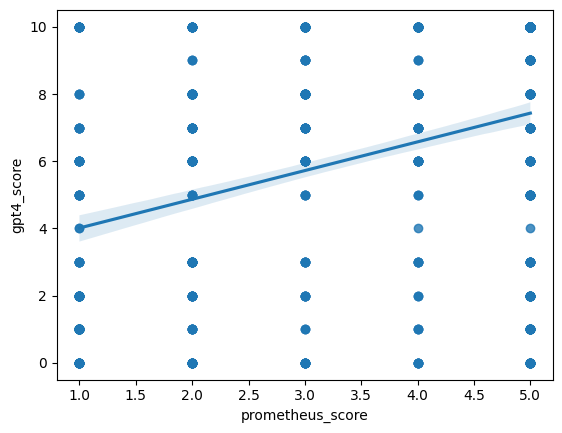

In [4]:
print(len(dfs[dfs.prometheus_score < 0]))
# dfs.plot.regplot(x="prometheus_score", y="gpt4_score")
df = dfs[dfs.prometheus_score >= 0]
sns.regplot(data=df, x="prometheus_score", y="gpt4_score")

/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from current font.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from current font.
  fig.canvas.d

/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from current font.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47200 (\N{HANGUL 

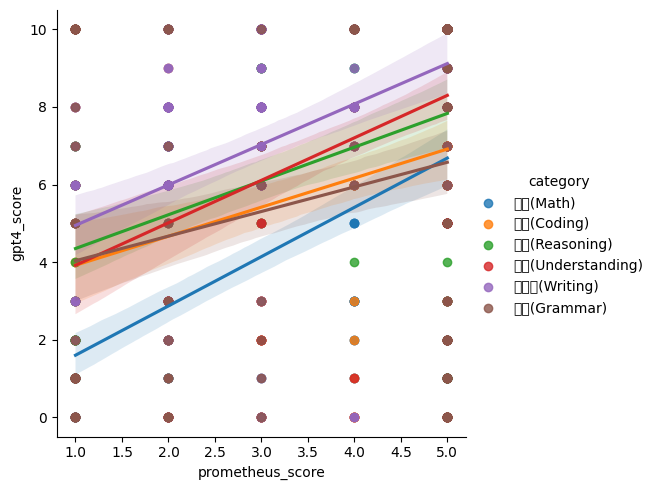

In [5]:
sns.lmplot(data=df, x="prometheus_score", y="gpt4_score", hue="category")

In [6]:
df[["prometheus_score", "gpt4_score"]].corr()

,prometheus_score,gpt4_score
prometheus_score,1.000000,0.360471
gpt4_score,0.360471,1.000000


In [7]:
df[["prometheus_score", "gpt4_score", "category"]].groupby("category").corr()

prometheus_score  gpt4_score
category                                                        
글쓰기(Writing)      prometheus_score          1.000000    0.436584
                  gpt4_score                0.436584    1.000000
문법(Grammar)       prometheus_score          1.000000    0.262858
                  gpt4_score                0.262858    1.000000
수학(Math)          prometheus_score          1.000000    0.551298
                  gpt4_score                0.551298    1.000000
이해(Understanding) prometheus_score          1.000000    0.436034
                  gpt4_score                0.436034    1.000000
추론(Reasoning)     prometheus_score          1.000000    0.395449
                  gpt4_score                0.395449    1.000000
코딩(Coding)        prometheus_score          1.000000    0.290976
                  gpt4_score                0.290976    1.000000